<a href="https://colab.research.google.com/github/AngelaZhang111/team-five/blob/main/determinants_of_international_student_mobility_a_panel_data_analysis__1998_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col


In [ ]:
intl_students = pd.read_csv("share-of-students-from-abroad（International students as % of tertiary students）.csv")

countries = ["United Kingdom","Canada","France"]

intl_students = intl_students[intl_students["Entity"].isin(countries)]

intl_students = intl_students[ (intl_students["Year"] >= 2010) & (intl_students["Year"] <= 2020)]

intl_students = intl_students[["Entity", "Year", "Share of students from abroad"]]

intl_students = intl_students.rename(columns={
    "Entity": "country",
    "Year": "year",
    "Share of students from abroad": "intl_students_share"
})

intl_students = intl_students.sort_values(["country", "year"])

intl_students.head(11)

,country,year,intl_students_share
395,Canada,2010,7.43157
396,Canada,2011,8.16061
397,Canada,2012,8.98000
398,Canada,2013,9.72349
399,Canada,2014,10.41181
400,Canada,2015,10.97118
401,Canada,2016,11.89155
402,Canada,2017,12.91719
403,Canada,2018,13.83800
404,Canada,2019,16.22091


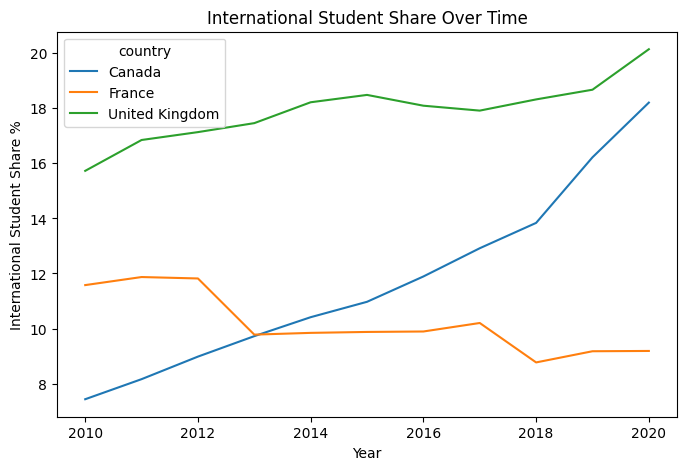

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.lineplot(data=intl_students, x='year', y='intl_students_share', hue='country')

plt.xlabel('Year')
plt.ylabel('International Student Share %')
plt.title('International Student Share Over Time')
plt.show()


In [ ]:
cpi = pd.read_csv("fc8d72a8-c445-42a8-b5b1-a7e811f9ffd8_Data（CPI）.csv")
cpi = cpi[cpi["Country Name"].isin(countries)]
cpi["Country Name"].value_counts()
year_cols = [
    "2010 [YR2010]", "2011 [YR2011]", "2012 [YR2012]", "2013 [YR2013]",
    "2014 [YR2014]", "2015 [YR2015]", "2016 [YR2016]", "2017 [YR2017]",
    "2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]"
]
cpi = cpi[["Country Name"] + year_cols]


cpi = pd.melt(
    cpi,
    id_vars=["Country Name"],
    var_name="year",
    value_name="cpi"
)

cpi["year"] = cpi["year"].str[:4]
cpi["year"] = pd.to_numeric(cpi["year"], errors="coerce")
cpi["cpi"] = pd.to_numeric(cpi["cpi"], errors="coerce")
cpi = cpi.rename(columns={ "Country Name": "country" })

cpi = cpi.sort_values(["country", "year"])


cpi.head(11)



,country,year,cpi
0,Canada,2010,100.000000
3,Canada,2011,102.912135
6,Canada,2012,104.471952
9,Canada,2013,105.452204
12,Canada,2014,107.462793
15,Canada,2015,108.672009
18,Canada,2016,110.224671
21,Canada,2017,111.984831
24,Canada,2018,114.524900
27,Canada,2019,116.757298


In [ ]:
exch = pd.read_csv(
    "API_PA.NUS.FCRF_DS2_en_csv_v2_21（Exchange rate）.csv",
    skiprows=4
)
exch = exch[exch["Country Name"].isin(countries)]
year_cols = [
    "2010", "2011", "2012", "2013", "2014",
    "2015", "2016", "2017", "2018", "2019", "2020"
]

exch = exch[["Country Name"] + year_cols]

exch = pd.melt(
    exch,
    id_vars=["Country Name"],
    var_name="year",
    value_name="exchange_rate"
)
exch["year"] = pd.to_numeric(exch ["year"], errors="coerce")
exch = exch.rename(columns={ "Country Name": "country" })
exch = exch.sort_values(["country", "year"])
exch.head(11)

,country,year,exchange_rate
0,Canada,2010,1.030113
3,Canada,2011,0.989258
6,Canada,2012,0.999365
9,Canada,2013,1.030137
12,Canada,2014,1.104747
15,Canada,2015,1.278786
18,Canada,2016,1.325615
21,Canada,2017,1.297936
24,Canada,2018,1.295818
27,Canada,2019,1.326793


In [ ]:
unemp = pd.read_csv(
    "API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_29.csv",
    skiprows=4
)
unemp = unemp[unemp["Country Name"].isin(countries)]
year_cols = [
    "2010", "2011", "2012", "2013", "2014",
    "2015", "2016", "2017", "2018", "2019", "2020"
]

unemp = unemp[["Country Name"] + year_cols]

unemp = pd.melt(
    unemp,
    id_vars=["Country Name"],
    var_name="year",
    value_name="unemp_rate"
)
unemp["year"] = pd.to_numeric(unemp["year"], errors="coerce")
unemp = unemp.rename(columns={ "Country Name": "country" })
unemp = unemp.sort_values(["country", "year"])
unemp.head(11)


,country,year,unemp_rate
0,Canada,2010,8.178
3,Canada,2011,7.637
6,Canada,2012,7.392
9,Canada,2013,7.143
12,Canada,2014,7.023
15,Canada,2015,6.945
18,Canada,2016,7.038
21,Canada,2017,6.426
24,Canada,2018,5.837
27,Canada,2019,5.690


In [ ]:
tmp = pd.merge(intl_students, cpi, on=["country", "year"], how="inner")
tmp = pd.merge(tmp, exch,on=["country", "year"], how="inner")
panel = pd.merge(tmp, unemp,on=["country", "year"], how="inner")
panel = panel.sort_values(["country", "year"])
panel.head(20)


,country,year,intl_students_share,cpi,exchange_rate,unemp_rate
0,Canada,2010,7.43157,100.000000,1.030113,8.178
1,Canada,2011,8.16061,102.912135,0.989258,7.637
2,Canada,2012,8.98000,104.471952,0.999365,7.392
3,Canada,2013,9.72349,105.452204,1.030137,7.143
4,Canada,2014,10.41181,107.462793,1.104747,7.023
5,Canada,2015,10.97118,108.672009,1.278786,6.945
6,Canada,2016,11.89155,110.224671,1.325615,7.038
7,Canada,2017,12.91719,111.984831,1.297936,6.426
8,Canada,2018,13.83800,114.524900,1.295818,5.837
9,Canada,2019,16.22091,116.757298,1.326793,5.690


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model = ols('intl_students_share ~ cpi + exchange_rate + unemp_rate', data=panel).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     intl_students_share   R-squared:                       0.643
Model:                             OLS   Adj. R-squared:                  0.606
Method:                  Least Squares   F-statistic:                     17.42
Date:                 Sun, 11 Jan 2026   Prob (F-statistic):           1.17e-06
Time:                         16:48:52   Log-Likelihood:                -74.905
No. Observations:                   33   AIC:                             157.8
Df Residuals:                       29   BIC:                             163.8
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -18.4802     13.534 

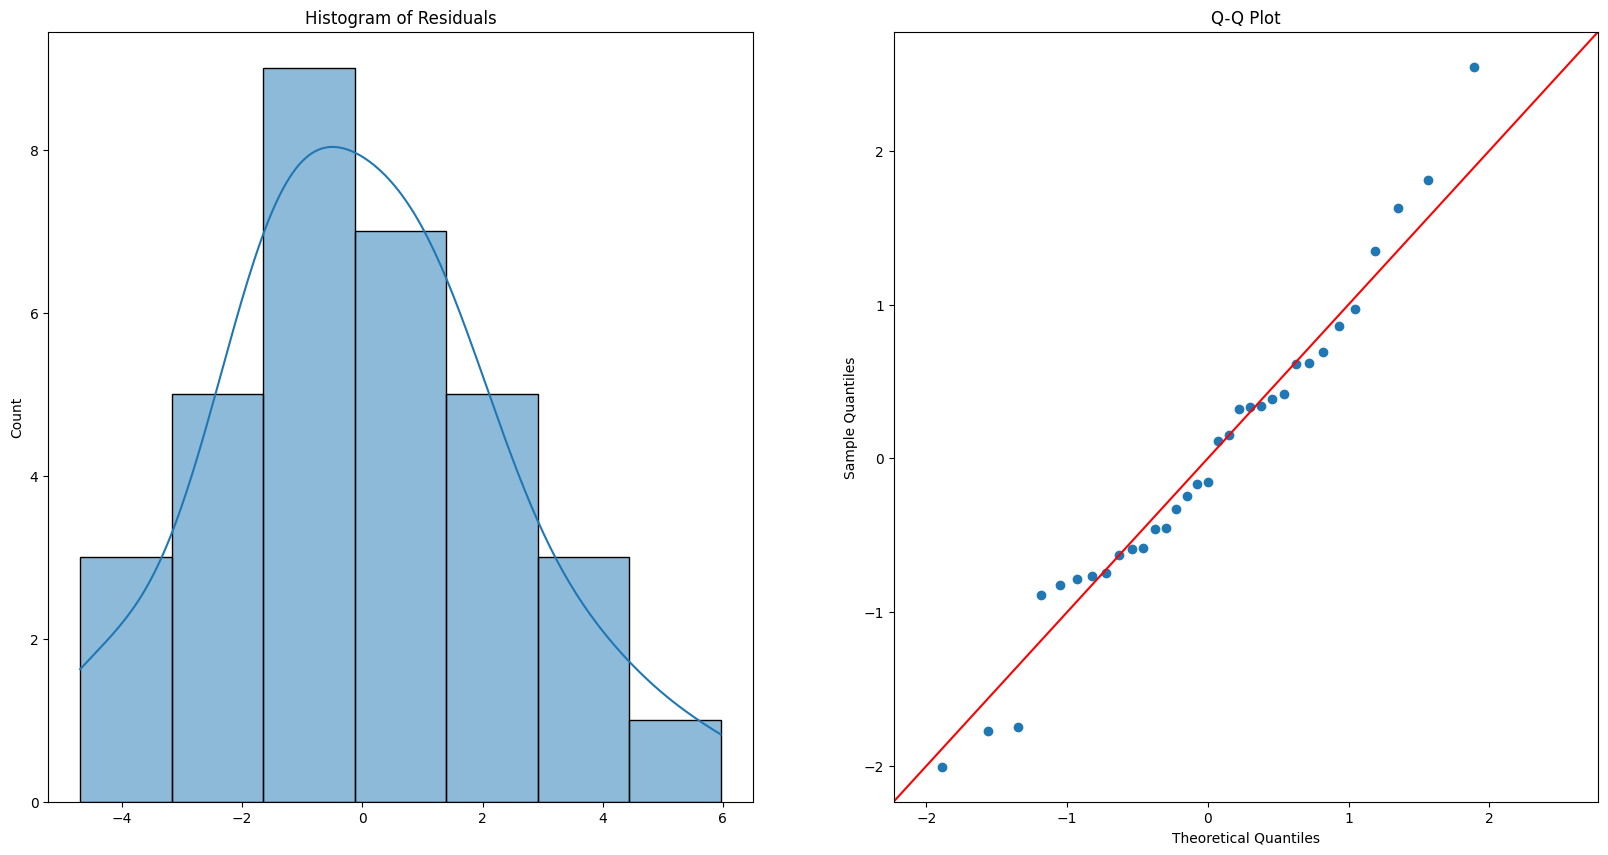

In [ ]:
residuals = model.resid
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = [20, 10]

fig, axes = plt.subplots(1, 2)

sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title("Q-Q Plot")

plt.show()


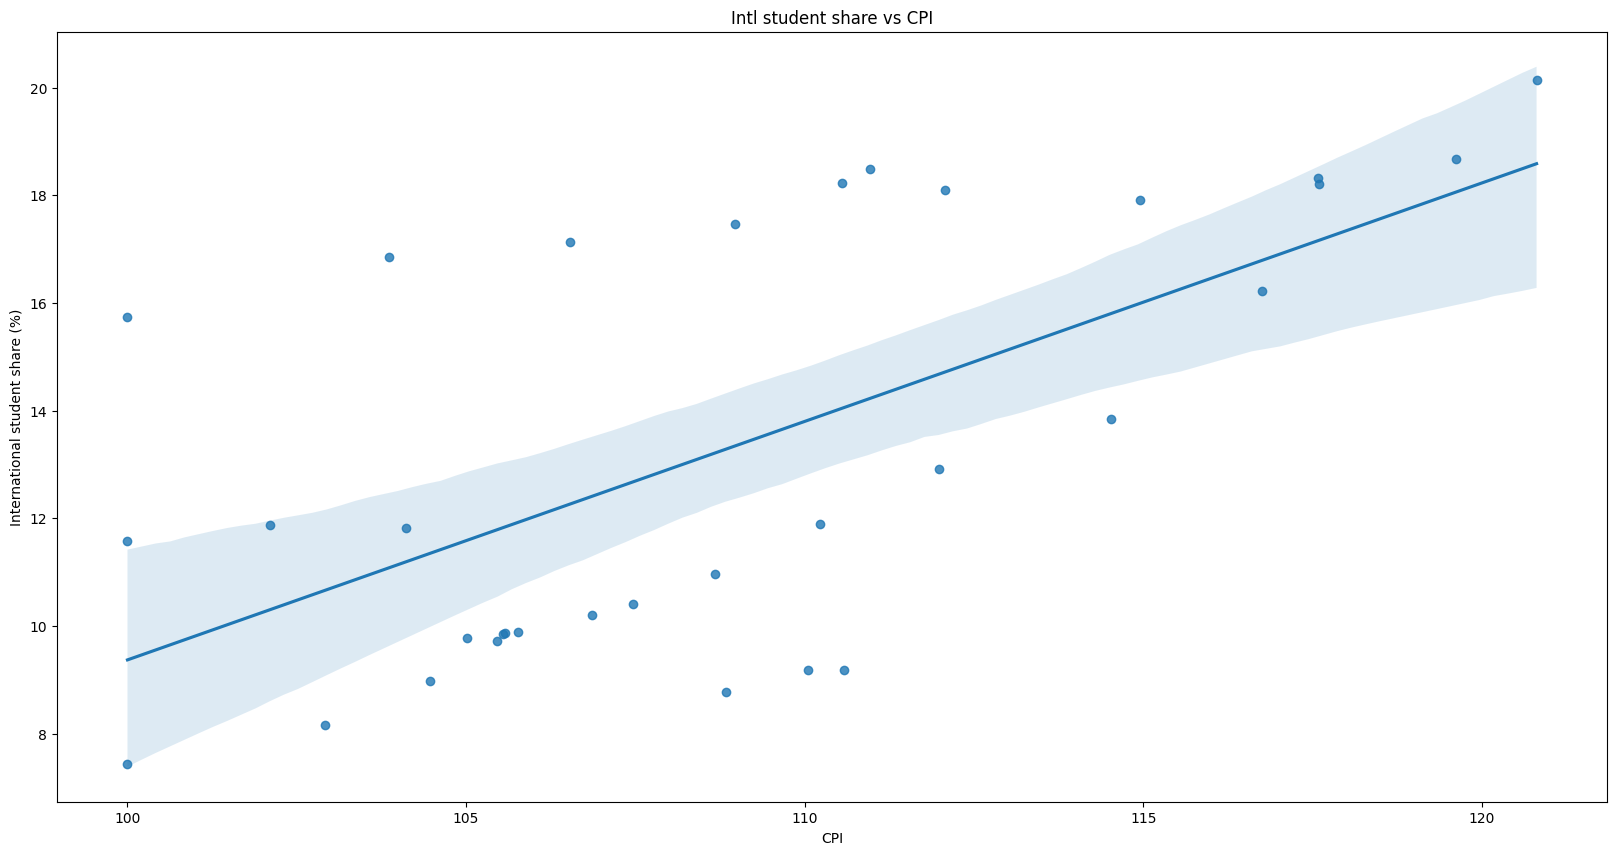

In [ ]:
sns.regplot(data=panel, x="cpi", y="intl_students_share")
plt.xlabel("CPI")
plt.ylabel("International student share (%)")
plt.title("Intl student share vs CPI")
plt.show()


In [ ]:
model_fe_country = ols("intl_students_share ~ cpi + exchange_rate + unemp_rate + C(country)",data=panel).fit()
print(model_fe_country.summary())


                             OLS Regression Results                            
Dep. Variable:     intl_students_share   R-squared:                       0.878
Model:                             OLS   Adj. R-squared:                  0.855
Method:                  Least Squares   F-statistic:                     38.88
Date:                 Sun, 11 Jan 2026   Prob (F-statistic):           1.64e-11
Time:                         16:48:56   Log-Likelihood:                -57.188
No. Observations:                   33   AIC:                             126.4
Df Residuals:                       27   BIC:                             135.4
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interc

In [ ]:
model_fe_tw = ols("intl_students_share ~ cpi + exchange_rate + unemp_rate + C(country) + C(year)",data=panel).fit()
print(model_fe_tw.summary())


                             OLS Regression Results                            
Dep. Variable:     intl_students_share   R-squared:                       0.944
Model:                             OLS   Adj. R-squared:                  0.894
Method:                  Least Squares   F-statistic:                     19.05
Date:                 Sun, 11 Jan 2026   Prob (F-statistic):           9.80e-08
Time:                         16:48:56   Log-Likelihood:                -44.388
No. Observations:                   33   AIC:                             120.8
Df Residuals:                       17   BIC:                             144.7
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interc

In [ ]:
results_table = summary_col(
    [model, model_fe_country, model_fe_tw],
    stars=True,
    model_names=['OLS', 'Country FE', 'Country + Year FE'],
    info_dict={'N': lambda x: f"{int(x.nobs)}",'R2': lambda x: f"{x.rsquared:.3f}"})

print(results_table)



                                OLS      Country FE Country + Year FE
---------------------------------------------------------------------
Intercept                    -18.4802   -29.9609*** -89.8744***      
                             (13.5343)  (9.3098)    (18.8494)        
cpi                          0.3916***  0.2922***   0.8237***        
                             (0.1117)   (0.0995)    (0.2044)         
exchange_rate                -7.4760*** 4.4393      11.8279          
                             (1.9813)   (4.2926)    (6.8765)         
unemp_rate                   -0.5479*   0.6321**    0.5352           
                             (0.3193)   (0.2822)    (0.3388)         
C(country)[T.France]                    -0.4081     4.1895           
                                        (1.6521)    (2.7119)         
C(country)[T.United Kingdom]            8.4714***   10.7196***       
                                        (2.3141)    (3.4485)         
C(year)[T.2011]    

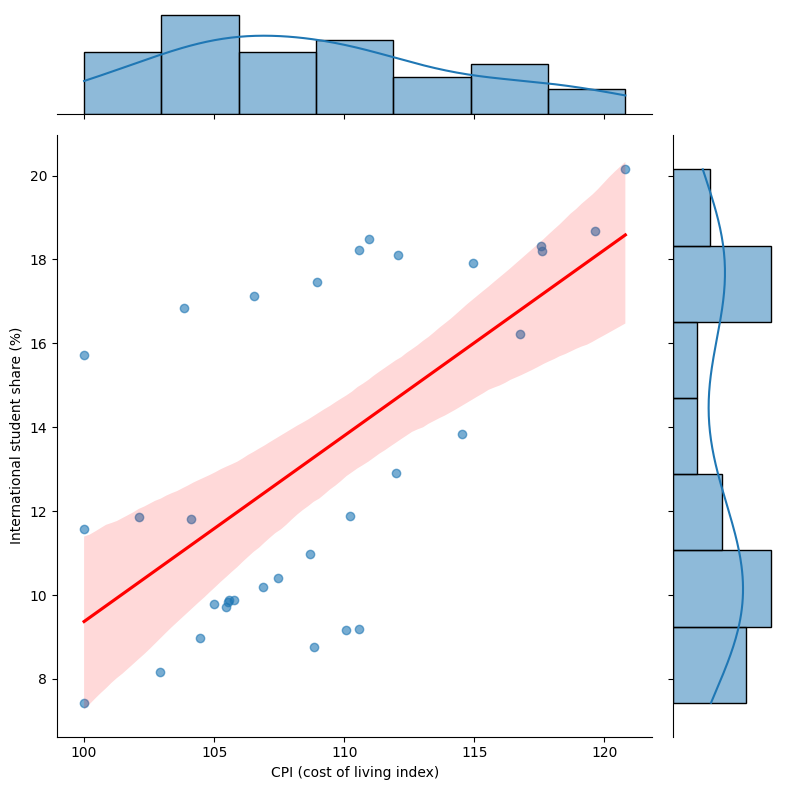

In [ ]:
# CPI vs. International Student Percentage
sns.jointplot(data=panel, x="cpi", y="intl_students_share", kind="reg", scatter_kws=dict(alpha=0.6), line_kws=dict(color="red"), height=8)

plt.xlabel("CPI (cost of living index)")
plt.ylabel("International student share (%)")
plt.show()


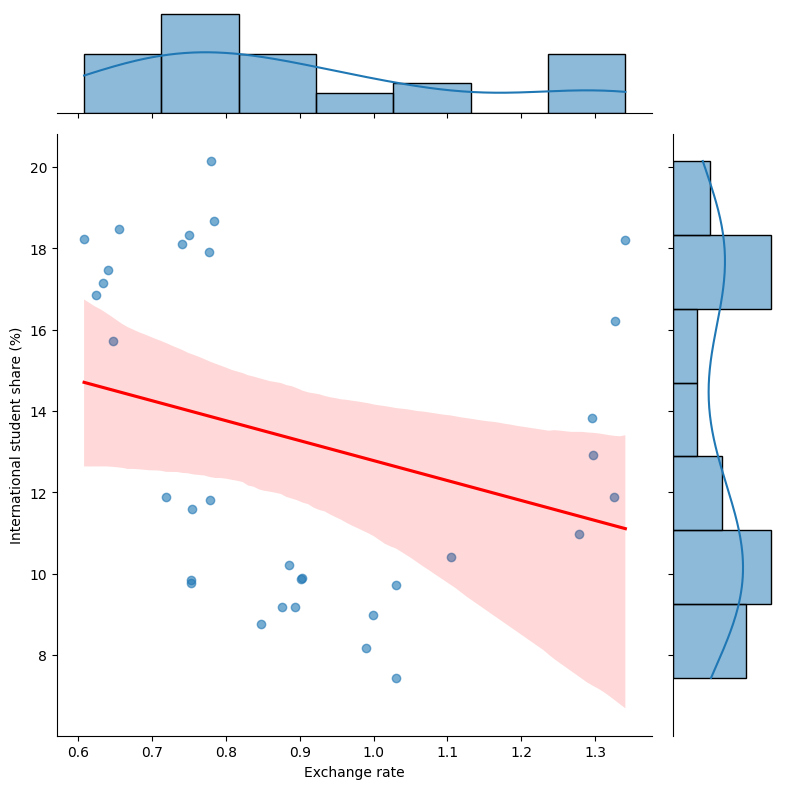

In [ ]:
# exchange_rate

sns.jointplot(data=panel, x="exchange_rate", y="intl_students_share",kind="reg", scatter_kws=dict(alpha=0.6),line_kws=dict(color="red"), height=8)
plt.xlabel("Exchange rate")
plt.ylabel("International student share (%)")
plt.show()


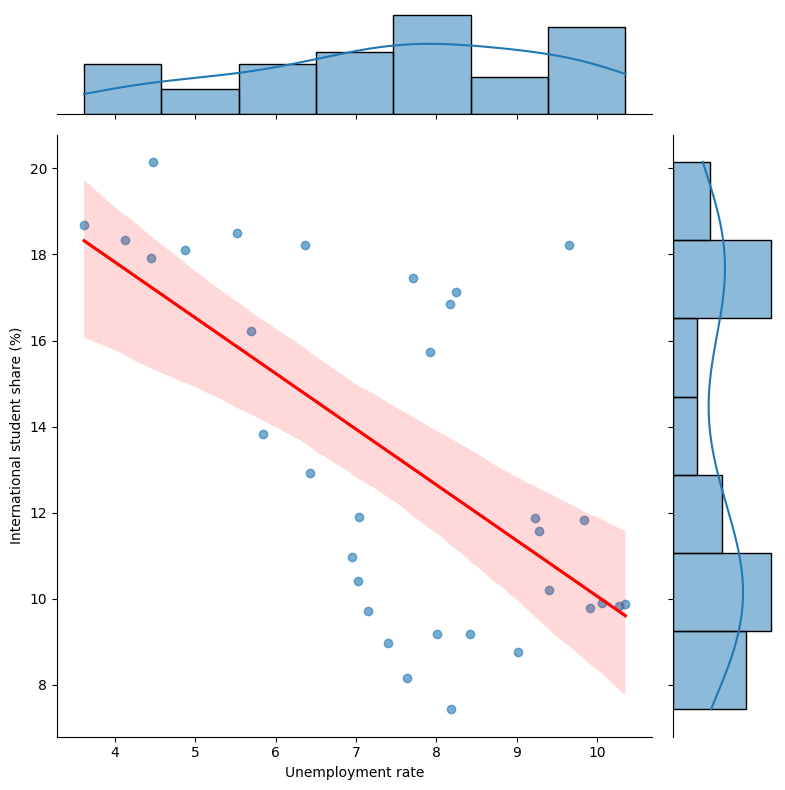

In [ ]:
sns.jointplot(data=panel, x="unemp_rate", y="intl_students_share",kind="reg", scatter_kws=dict(alpha=0.6),line_kws=dict(color="red"), height=8)
plt.xlabel("Unemployment rate")
plt.ylabel("International student share (%)")
plt.show()
